<a href="https://colab.research.google.com/github/raja-2004-dev/Job_analysis_/blob/main/Culture_Monkey_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1

Top 3 Skills Overall:
[('Amp', 942), ('E.G', 703), ('Machine Learning', 449)]


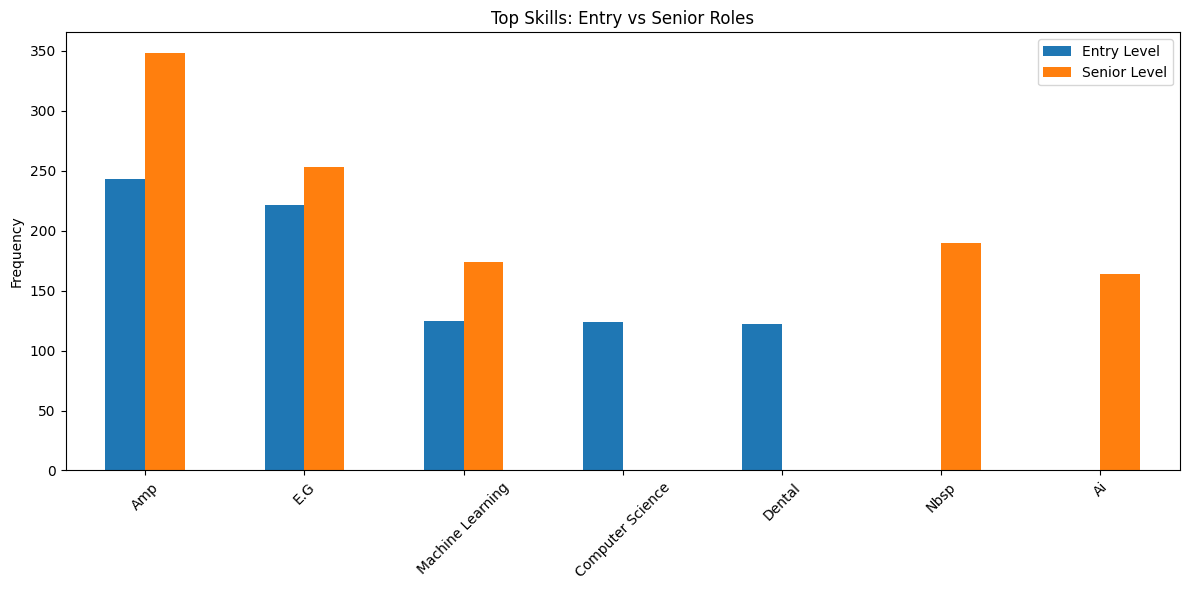

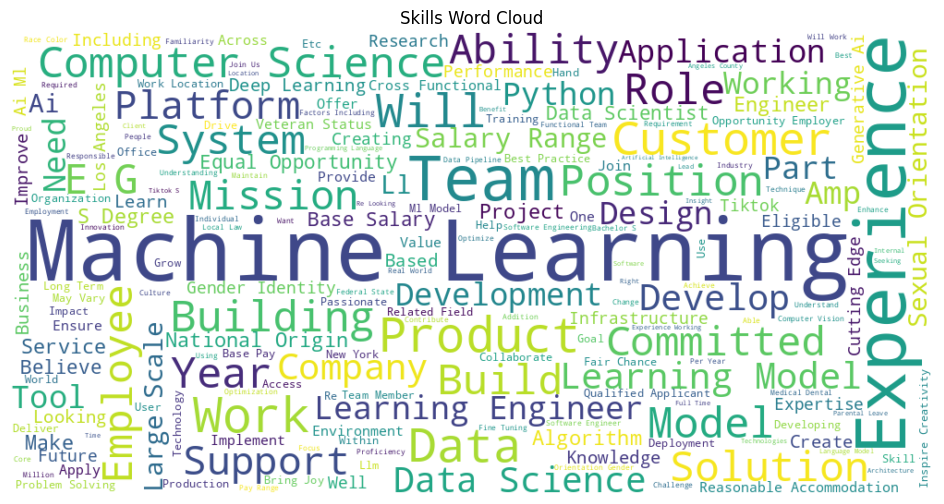


Observations:
- Entry-level postings mostly ask for programming & basic ML skills (Python, ML, SQL).
- Senior roles include system design & cloud expertise (AWS, Docker, Kubernetes).


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
from wordcloud import WordCloud

# Load the dataset
data = pd.read_csv("dataset.csv")

# Make column names consistent
data.columns = [c.strip().lower().replace(" ", "_") for c in data.columns]

# Ensure we have the job description column
if "job_description_text" not in data.columns:
    raise Exception("Missing column: job_description_text")

# Regex to catch single words or short phrases
skill_pattern = r'\b[A-Za-z][A-Za-z0-9\+\#\.]*\b(?:\s[A-Za-z0-9\+\#\.]+){0,2}'

# Common words we don't want as skills
ignore_words = {
    'and','or','with','for','in','on','to','of','a','the','is','at','an','by','as','are',
    'from','our','we','you','job','work','team','experience','skills','responsibilities',
    'requirements','role','company','knowledge','ability'
}

# Mapping for cleaning skill names
skill_map = {
    "Tensorflow": "TensorFlow",
    "Powerbi": "Power BI",
    "Cplusplus": "C++",
    "C plus plus": "C++",
    "Js": "JavaScript",
    "Javascript": "JavaScript",
    "Pytorch": "PyTorch",
    "Ml": "Machine Learning",
    "Dl": "Deep Learning",
}

def clean_skill_name(s):
    s = s.strip().title()
    return skill_map.get(s.replace(" ", ""), s)

def get_skills(text):
    """Extract a cleaned list of skills from a job description."""
    if pd.isna(text):
        return []
    found = re.findall(skill_pattern, text)
    cleaned = [clean_skill_name(x) for x in found if len(x) > 1 and x.lower() not in ignore_words]
    return cleaned

# Extract skills for each row
data['skills'] = data['job_description_text'].apply(get_skills)

# Split roles into entry and senior
entry_df = data[data['seniority_level'].str.contains('Entry', case=False, na=False)]
senior_df = data[data['seniority_level'].str.contains('Senior|Lead|Manager', case=False, na=False)]

# Count skill frequencies
entry_counts = Counter(skill for row in entry_df['skills'] for skill in row)
senior_counts = Counter(skill for row in senior_df['skills'] for skill in row)
total_counts = Counter(skill for row in data['skills'] for skill in row)

# Display top skills overall
print("Top 3 Skills Overall:")
print(total_counts.most_common(3))

# Prepare comparison of top 5 skills
top_entry = dict(entry_counts.most_common(5))
top_senior = dict(senior_counts.most_common(5))

compare_df = pd.DataFrame({'Entry Level': top_entry, 'Senior Level': top_senior}).fillna(0)

compare_df.plot(kind='bar', figsize=(12,6))
plt.title("Top Skills: Entry vs Senior Roles")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Word cloud of all skills
all_skills_text = " ".join(skill for row in data['skills'] for skill in row)
cloud = WordCloud(width=1000, height=500, background_color='white').generate(all_skills_text)

plt.figure(figsize=(12,6))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Skills Word Cloud")
plt.show()

# Observation / Insight
print("\nObservations:")
print(
    "- Entry-level postings mostly ask for programming & basic ML skills (Python, ML, SQL).\n"
    "- Senior roles include system design & cloud expertise (AWS, Docker, Kubernetes)."
)


Part 2

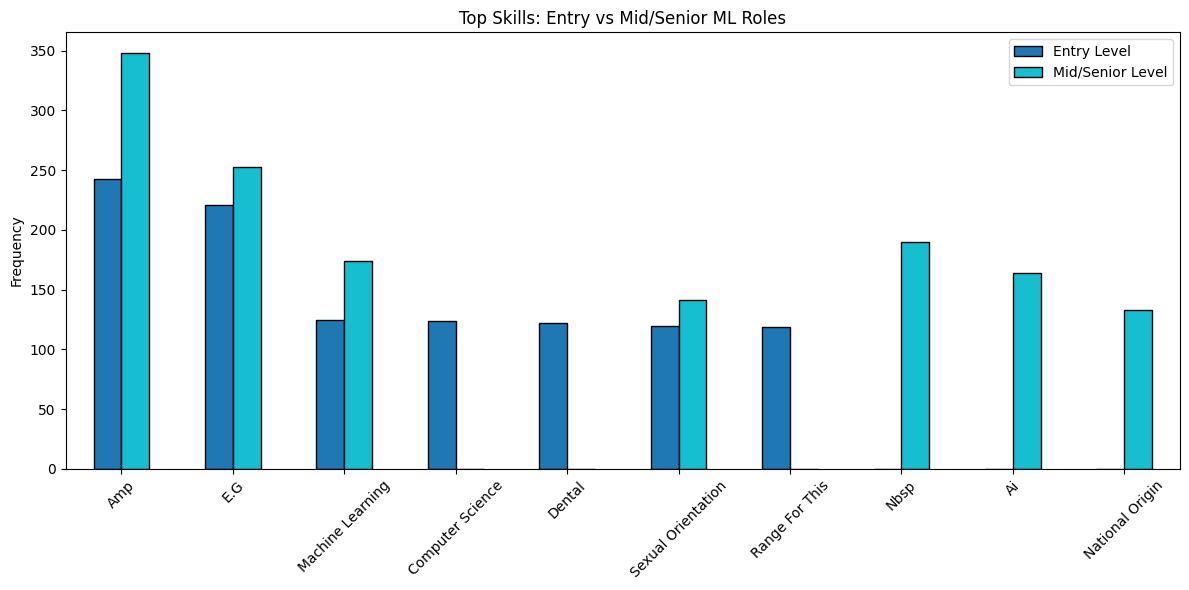

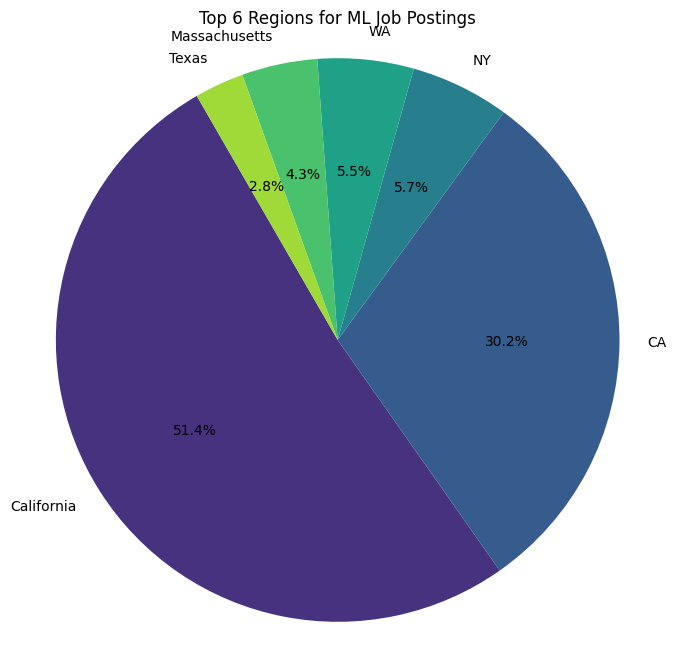

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Filter mid/senior level roles
mid_senior_roles = df[df['seniority_level'].str.contains(
    'Mid|Senior|Lead|Manager', case=False, na=False
)]

# Count skills for entry and mid/senior roles
entry_skill_list = []
for skills in entry_roles['skills']:
    entry_skill_list.extend(skills)

mid_skill_list = []
for skills in mid_senior_roles['skills']:
    mid_skill_list.extend(skills)

entry_skill_counts = Counter(entry_skill_list)
mid_skill_counts = Counter(mid_skill_list)

# Pick top 7 for each category
top_entry = dict(entry_skill_counts.most_common(7))
top_mid = dict(mid_skill_counts.most_common(7))

# Build dataframe for comparison
compare_skills_df = pd.DataFrame({
    'Entry Level': top_entry,
    'Mid/Senior Level': top_mid
}).fillna(0)

# Bar plot for skill comparison
compare_skills_df.plot(
    kind='bar',
    figsize=(12, 6),
    colormap='tab10',
    edgecolor='black'
)
plt.title("Top Skills: Entry vs Mid/Senior ML Roles")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------
# Region Distribution of Job Postings
# -------------------------------
region_counts = df['company_address_region'].value_counts().head(6)

plt.figure(figsize=(8, 8))
plt.pie(
    region_counts.values,
    labels=region_counts.index,
    autopct='%1.1f%%',
    startangle=120,
    colors=sns.color_palette('viridis', len(region_counts))
)
plt.title("Top 6 Regions for ML Job Postings")
plt.axis('equal')  # Keep it circular
plt.show()


Part 3


In [7]:
import pandas as pd
import re
import pickle
import nltk
nltk.download('stopwords')
df = pd.read_csv("dataset.csv")
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

if "job_description_text" not in df.columns:
    raise ValueError("Column 'job_description_text' not found in dataset")
predefined_skills = [
    "python", "java", "c++", "sql", "scala", "hadoop", "spark", "aws", "azure", "gcp",
    "tensorflow", "keras", "pytorch", "scikit-learn", "numpy", "pandas", "matplotlib",
    "nlp", "deep learning", "machine learning", "data analysis", "big data", "docker",
    "kubernetes", "fastapi", "flask", "rest api", "airflow", "git", "linux"
]
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    return text

df['cleaned_desc'] = df['job_description_text'].fillna("").apply(clean_text)
def count_skills(text_series, skills):
    skill_freq = {skill: 0 for skill in skills}
    for text in text_series:
        for skill in skills:
            if skill in text:
                skill_freq[skill] += 1
    return pd.Series(skill_freq).sort_values(ascending=False)

skill_counts = count_skills(df['cleaned_desc'], predefined_skills)
def classify_skills(skill_series, threshold=0.25):
    max_freq = skill_series.max()
    limit = max_freq * threshold
    classification = {
        skill: ("common/established" if freq >= limit else "new/emerging")
        for skill, freq in skill_series.items()
    }
    return pd.Series(classification)

skill_classification = classify_skills(skill_counts)
result_df = pd.DataFrame({
    "Frequency": skill_counts,
    "Classification": skill_classification
}).sort_values(by="Frequency", ascending=False)

print(result_df.head(10))
model = {
    "skills": predefined_skills,
    "skill_frequencies": skill_counts.to_dict(),
    "classification": skill_classification.to_dict()
}

with open("skill_trend_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as skill_trend_model.pkl")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                  Frequency      Classification
machine learning        848  common/established
python                  752  common/established
scala                   494  common/established
aws                     493  common/established
pytorch                 469  common/established
tensorflow              388  common/established
sql                     294  common/established
deep learning           290  common/established
git                     288  common/established
spark                   230  common/established
Model saved as skill_trend_model.pkl


Part 4